# How does the Clause weight learning work
Take Citeseer as an example. Model=KeGCN with 3 hidden Conv layers and 3 KE layers on top
How does the learning of the knowledge work?



##  Overview of Clauses
### Clause Compliance for Citeseer
|         | overall | train  | valid  | test    |
|---------|---------|--------|--------|---------|
| Class_0 | 0.3646  | 0.3086 | 0.1666 | 0.4166  |
| Class_1 | 0.6366  | 0.5721 | 0.7741 | 0.6281  |
| Class_2 | 0.7835  | 0.7837 | 0.75   | 0.7762  |
| Class_3 | 0.7625  | 0.72   | 0.8    | 0.7894  |
| Class_4 | 0.7951  | 0.7705 | 0.8846 | 0.8088  |
| Class_5 | 0.7910  | 0.7739 | 0.6666 | 0.84482 |


### Class Distribution for Citeseer
|         | overall | train  | valid   | test   |
|---------|---------|--------|---------|--------|
| Class_0 | 0.0793  | 0.0864 | 0.058   | 0.077  |
| Class_1 | 0.1773  | 0.1762 | 0.172   | 0.182  |
| Class_2 | 0.2007  | 0.2030 | 0.232   | 0.181  |
| Class_3 | 0.2107  | 0.1992 | 0.212   | 0.231  |
| Class_4 | 0.1791  | 0.1822 | 0.188   | 0.169  |
| Class_5 | 0.1526  | 0.1527 | 0.138   | 0.16   |

In [30]:
# Imports
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import json
import seaborn as sns

In [31]:
# Load the run results
api = wandb.Api()
run = api.run("luisawerner/nesy23_clauseweights/1asef4j6")
clause_weights=eval(run.summary['logged_clause_weights'])
preds_dict = eval(run.summary['preds'])
print('test')

test


In [32]:
print(f'Parameters:')
print(run.config)

Parameters:
{'lr': 0.037, 'mps': False, 'mode': 'transductive', 'runs': 1, 'seed': 1234, 'model': 'KENN_GCN', 'device': 1, 'epochs': 200, 'dataset': 'CiteSeer', 'dropout': 0.5, 'adam_eps': 1e-07, 'use_norm': True, 'create_kb': True, 'num_parts': 100, 'num_steps': 5, 'adam_beta1': 0.9, 'adam_beta2': 0.99, 'batch_size': 512, 'es_enabled': True, 'eval_steps': 1, 'full_batch': True, 'max_weight': 500, 'min_weight': 0, 'num_layers': 5, 'undirected': False, 'es_patience': 10, 'load_baseNN': False, 'num_workers': 0, 'walk_length': 3, 'wandb_label': 'test', 'es_min_delta': 0.001, 'save_results': True, 'clause_weight': 0.5, 'num_neighbors': [25, 10, 5, 5, 5, 5, 5, 5, 5], 'boost_function': 'GodelBoostConormApprox', 'knowledge_base': 'class_0\nCite\n\n>\n_:nclass_0(x),nCite(x.y),class_0(y)\n', 'quantity_range': [0, 1], 'attention_heads': 8, 'edges_drop_rate': 0.35, 'hidden_channels': 128, 'normalize_edges': False, 'num_kenn_layers': 3, 'planetoid_split': 'full', 'sample_coverage': 10, 'save_data_

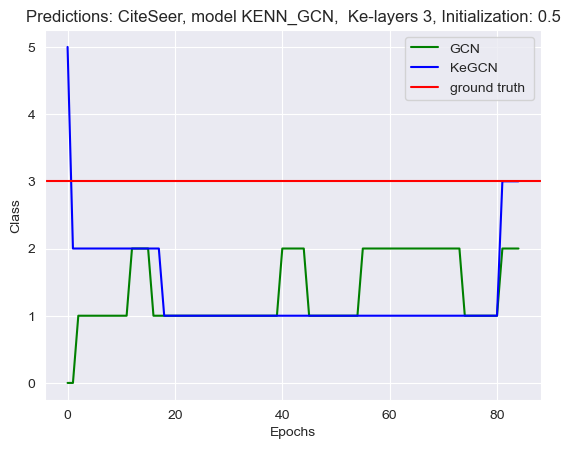

In [50]:
# plots only first KE layer weights
#
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
n = 6
base_preds = [i[n] for i in preds_dict[0]['base_preds']]
preds = [i[n] for i in preds_dict[0]['preds']]
y_true = preds_dict[0]['y_true'][n]

plt.plot(base_preds, color='green')
plt.plot(preds, color='blue')
plt.axhline(y_true, color='red')


# plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Class')
plt.legend(['GCN', 'KeGCN', 'ground truth '])
plt.title(f'Predictions: CiteSeer, model {run.config["model"]},  Ke-layers {run.config["num_kenn_layers"]}, Initialization: {run.config["clause_weight"]}')
plt.show()

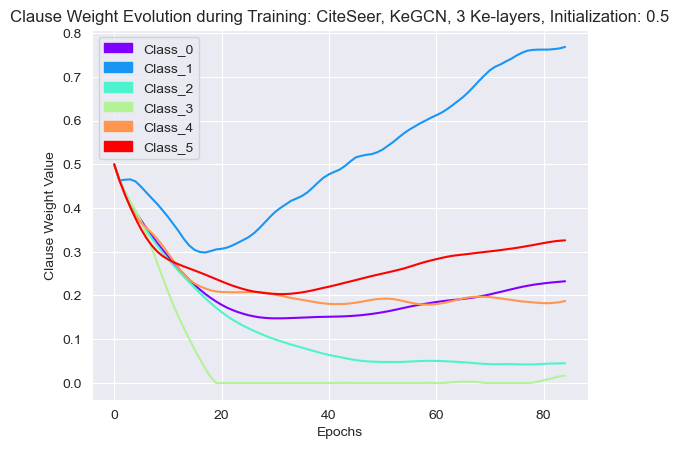

In [25]:
plt.figure()
color = plt.cm.rainbow(np.linspace(0, 1, 6))
patches = []
for k, j in enumerate(['0', '1', '2', '3', '4', '5']):
    patches.append(mpatches.Patch(color=color[k], label='Class_'+j))
    _list = clause_weights[0][0][j]
    plt.plot(_list, color=color[k])

plt.legend(handles=patches)
# plt.ylim(0.00, 0.6)
plt.xlabel('Epochs')
plt.ylabel('Clause Weight Value')
plt.title(f'Clause Weight Evolution during Training: CiteSeer, KeGCN, 3 Ke-layers, Initialization: {run.config["clause_weight"]}')
plt.show()